# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2023-07-21 19:43:03.890928: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-21 19:43:03.911396: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 19:43:04.070258: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 19:43:04.071188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 19:43:04.813647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

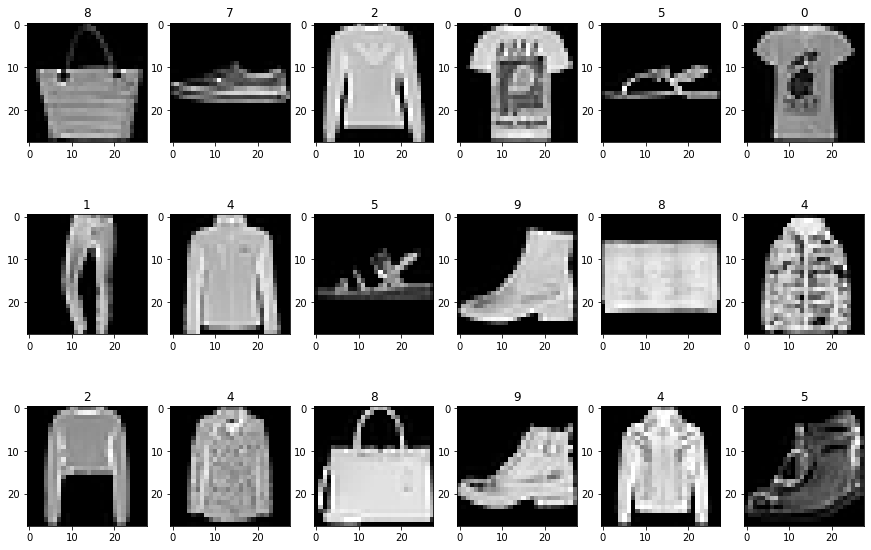

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 21s 22ms/step - loss: 0.3943 - accuracy: 0.8633 - val_loss: 0.3254 - val_accuracy: 0.8827
Epoch 2/50
938/938 [==============================] - 20s 22ms/step - loss: 0.2651 - accuracy: 0.9054 - val_loss: 0.3002 - val_accuracy: 0.8923
Epoch 3/50
938/938 [==============================] - 22s 23ms/step - loss: 0.2260 - accuracy: 0.9170 - val_loss: 0.3016 - val_accuracy: 0.8954
Epoch 4/50
938/938 [==============================] - 22s 23ms/step - loss: 0.1949 - accuracy: 0.9286 - val_loss: 0.3043 - val_accuracy: 0.8986
Epoch 5/50
938/938 [==============================] - 22s 24ms/step - loss: 0.1735 - accuracy: 0.9373 - val_loss: 0.3158 - val_accuracy: 0.8968
Epoch 6/50
938/938 [==============================] - 23s 24ms/step - loss: 0.1560 - accuracy: 0.9432 - val_loss: 0.3119 - val_accuracy: 0.9029
Epoch 7/50
938/938 [==============================] - 33s 35ms/step - loss: 0.1395 - accuracy: 0.9491 - val_loss: 0.3351 - val_accuracy:

Train Acc      0.9055162668228149
Validation Acc 0.90420001745224


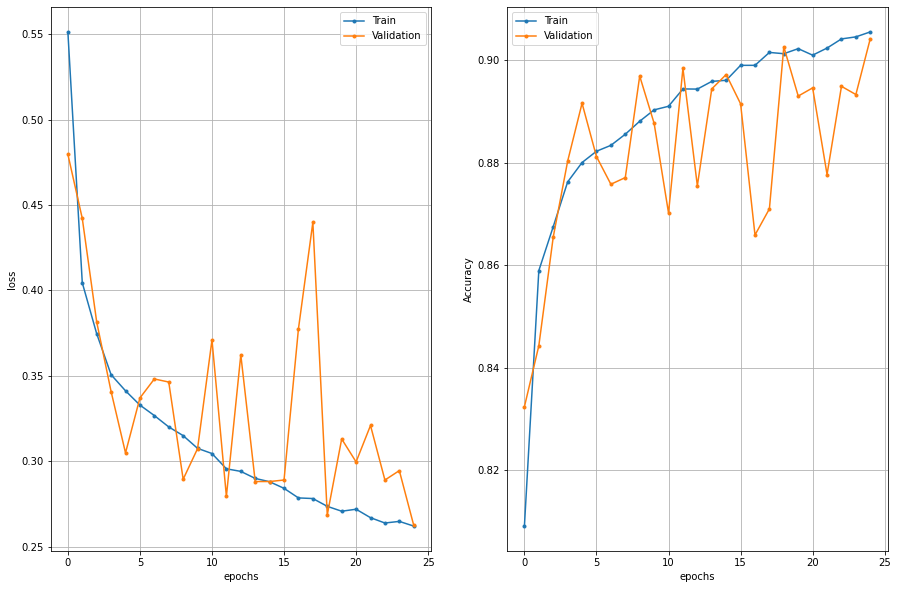

In [12]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

## Dropout

In [33]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dropout(0.5)(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_4 (Dropout)         (None, 25088)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               3211392   
                                                                 
 dense_19 (Dense)            (None, 10)                1290

In [34]:
# Train the network

epochs = 25
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/25
938/938 [==============================] - 27s 29ms/step - loss: 0.4210 - accuracy: 0.8522 - val_loss: 0.3338 - val_accuracy: 0.8799
Epoch 2/25
938/938 [==============================] - 29s 31ms/step - loss: 0.3169 - accuracy: 0.8856 - val_loss: 0.3162 - val_accuracy: 0.8863
Epoch 3/25
938/938 [==============================] - 30s 32ms/step - loss: 0.2925 - accuracy: 0.8942 - val_loss: 0.3117 - val_accuracy: 0.8889
Epoch 4/25
938/938 [==============================] - 31s 33ms/step - loss: 0.2709 - accuracy: 0.9005 - val_loss: 0.2965 - val_accuracy: 0.8937
Epoch 5/25
938/938 [==============================] - 31s 34ms/step - loss: 0.2607 - accuracy: 0.9037 - val_loss: 0.3109 - val_accuracy: 0.8915
Epoch 6/25
938/938 [==============================] - 32s 34ms/step - loss: 0.2492 - accuracy: 0.9088 - val_loss: 0.2940 - val_accuracy: 0.8967
Epoch 7/25
938/938 [==============================] - 32s 34ms/step - loss: 0.2442 - accuracy: 0.9105 - val_loss: 0.2976 - val_accuracy:

Train Acc      0.9337000250816345
Validation Acc 0.9057000279426575


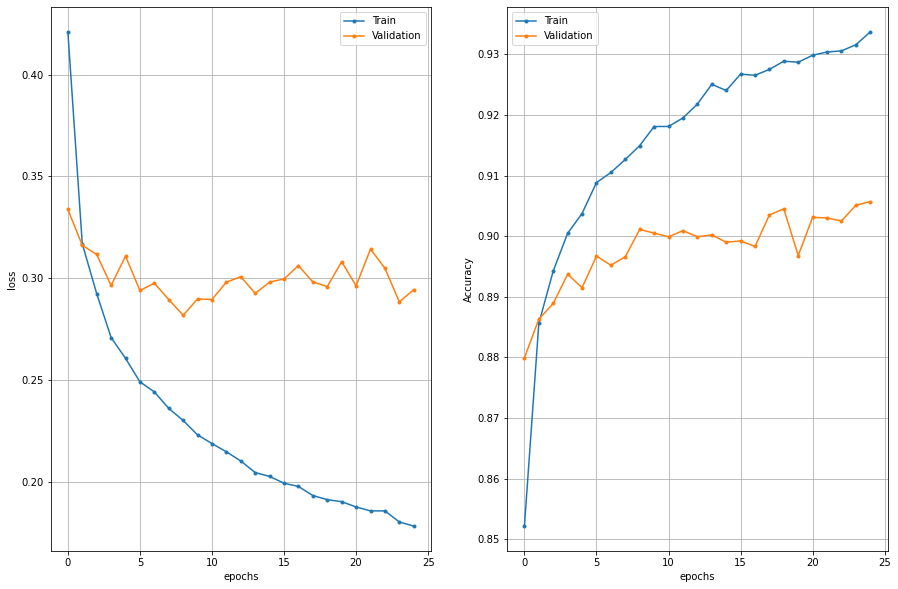

In [35]:
# Show the results

plot_history(history)

## Batch normalization

In [85]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 dropout_40 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 flatten_28 (Flatten)        (None, 25088)             0         
                                                                 
 batch_normalization_1 (Bat  (None, 25088)             100352    
 chNormalization)                                         

In [86]:
epochs = 25
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/25
938/938 [==============================] - 35s 36ms/step - loss: 1.3639 - accuracy: 0.8029 - val_loss: 0.5070 - val_accuracy: 0.8548
Epoch 2/25
938/938 [==============================] - 35s 37ms/step - loss: 0.4526 - accuracy: 0.8545 - val_loss: 0.4209 - val_accuracy: 0.8707
Epoch 3/25
938/938 [==============================] - 35s 38ms/step - loss: 0.3906 - accuracy: 0.8662 - val_loss: 0.4022 - val_accuracy: 0.8687
Epoch 4/25
938/938 [==============================] - 35s 37ms/step - loss: 0.3548 - accuracy: 0.8740 - val_loss: 0.3906 - val_accuracy: 0.8706
Epoch 5/25
938/938 [==============================] - 35s 37ms/step - loss: 0.3464 - accuracy: 0.8755 - val_loss: 0.3648 - val_accuracy: 0.8763
Epoch 6/25
938/938 [==============================] - 35s 37ms/step - loss: 0.3434 - accuracy: 0.8777 - val_loss: 0.4492 - val_accuracy: 0.8683
Epoch 7/25
938/938 [==============================] - 35s 37ms/step - loss: 0.3351 - accuracy: 0.8817 - val_loss: 0.3787 - val_accuracy:

Train Acc      0.9098333120346069
Validation Acc 0.8709999918937683


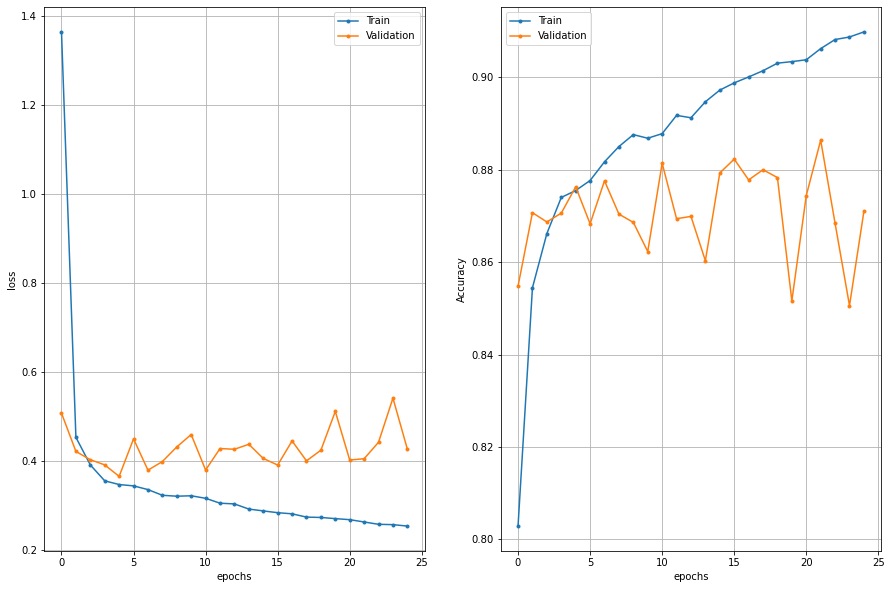

In [87]:
plot_history(history)

## Data augmentation

In [35]:
from sklearn.utils import shuffle

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...]) 

            yield x_, y_

In [51]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 flatten_16 (Flatten)        (None, 25088)             0         
                                                                 
 dense_32 (Dense)            (None, 128)               3211392   
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
epochs = 25
batch_size = 64
steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)
print(x_train.shape)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))

(60000, 28, 28)
Epoch 1/25
937/937 [==============================] - 21s 21ms/step - loss: 0.4214 - accuracy: 0.8530 - val_loss: 0.3786 - val_accuracy: 0.8681
Epoch 2/25
937/937 [==============================] - 20s 21ms/step - loss: 0.2983 - accuracy: 0.8939 - val_loss: 0.3254 - val_accuracy: 0.8856
Epoch 3/25
937/937 [==============================] - 21s 22ms/step - loss: 0.2613 - accuracy: 0.9057 - val_loss: 0.3077 - val_accuracy: 0.8866
Epoch 4/25
937/937 [==============================] - 20s 22ms/step - loss: 0.2387 - accuracy: 0.9149 - val_loss: 0.2990 - val_accuracy: 0.8970
Epoch 5/25
937/937 [==============================] - 20s 21ms/step - loss: 0.2249 - accuracy: 0.9198 - val_loss: 0.3022 - val_accuracy: 0.8950
Epoch 6/25
937/937 [==============================] - 23s 24ms/step - loss: 0.2087 - accuracy: 0.9256 - val_loss: 0.2978 - val_accuracy: 0.9004
Epoch 7/25
937/937 [==============================] - 20s 22ms/step - loss: 0.1961 - accuracy: 0.9291 - val_loss: 0.3058

Train Acc      0.9676327109336853
Validation Acc 0.8963000178337097


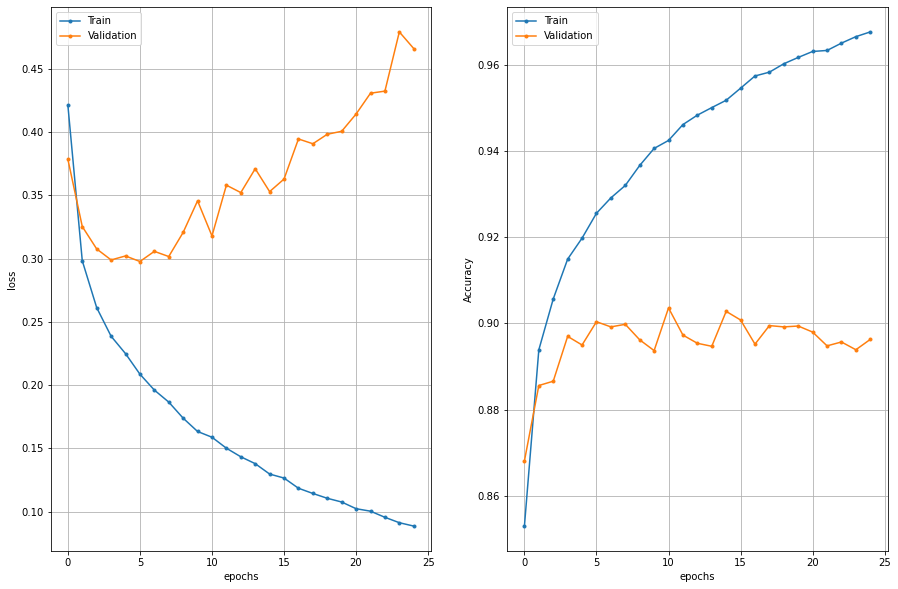

In [53]:
plot_history(history)

## Early stopping

In [57]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 flatten_18 (Flatten)        (None, 25088)             0         
                                                                 
 dense_36 (Dense)            (None, 128)               3211392   
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
epochs = 25
batch_size = 64
steps_per_epoch = len(y_train) // batch_size
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/25
937/937 [==============================] - 21s 22ms/step - loss: 0.4542 - accuracy: 0.8465 - val_loss: 0.3754 - val_accuracy: 0.8655
Epoch 2/25
937/937 [==============================] - 20s 22ms/step - loss: 0.3063 - accuracy: 0.8910 - val_loss: 0.3191 - val_accuracy: 0.8888
Epoch 3/25
937/937 [==============================] - 20s 22ms/step - loss: 0.2690 - accuracy: 0.9041 - val_loss: 0.3256 - val_accuracy: 0.8834
Epoch 4/25
937/937 [==============================] - 20s 21ms/step - loss: 0.2441 - accuracy: 0.9116 - val_loss: 0.3009 - val_accuracy: 0.8934
Epoch 5/25
937/937 [==============================] - 20s 21ms/step - loss: 0.2268 - accuracy: 0.9190 - val_loss: 0.3061 - val_accuracy: 0.8967
Epoch 6/25
937/937 [==============================] - 22s 24ms/step - loss: 0.2132 - accuracy: 0.9225 - val_loss: 0.3133 - val_accuracy: 0.8869
Epoch 7/25
937/937 [==============================] - 20s 21ms/step - loss: 0.2019 - accuracy: 0.9278 - val_loss: 0.2932 - val_accuracy:

Train Acc      0.967299222946167
Validation Acc 0.8967999815940857


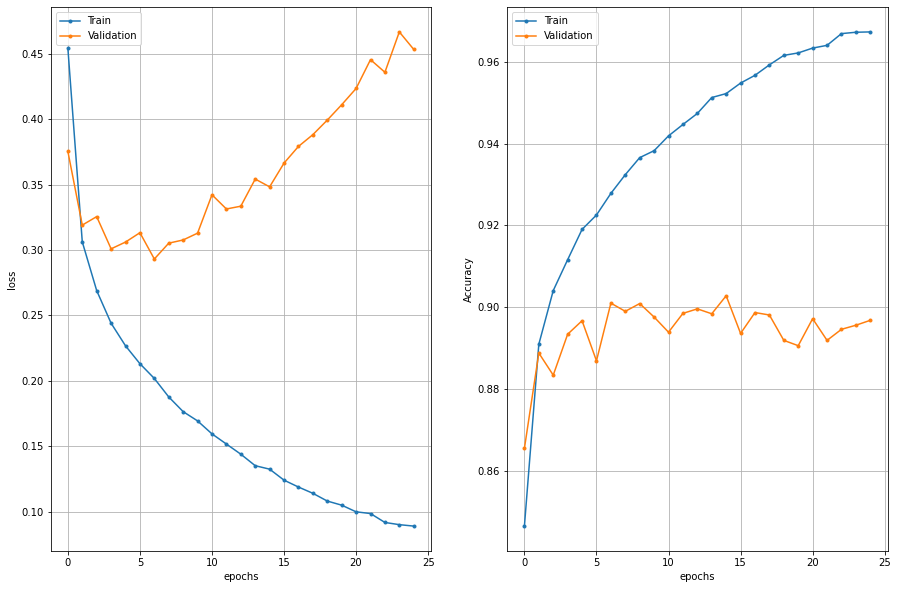

In [59]:
plot_history(history)

## Reducing the number of parameters (the size of the network)

In [82]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(64)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 flatten_27 (Flatten)        (None, 25088)             0         
                                                                 
 dense_54 (Dense)            (None, 64)                1605696   
                                                                 
 dense_55 (Dense)            (None, 10)                650       
                                                                 
Total params: 1606666 (6.13 MB)
Trainable params: 1606666 (6.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
epochs = 25
batch_size = 64
steps_per_epoch = len(y_train) // batch_size

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/25
938/938 [==============================] - 12s 13ms/step - loss: 0.4301 - accuracy: 0.8504 - val_loss: 0.3484 - val_accuracy: 0.8738
Epoch 2/25
938/938 [==============================] - 11s 12ms/step - loss: 0.2925 - accuracy: 0.8964 - val_loss: 0.3223 - val_accuracy: 0.8829
Epoch 3/25
938/938 [==============================] - 12s 12ms/step - loss: 0.2503 - accuracy: 0.9100 - val_loss: 0.3097 - val_accuracy: 0.8875
Epoch 4/25
938/938 [==============================] - 11s 12ms/step - loss: 0.2180 - accuracy: 0.9212 - val_loss: 0.3066 - val_accuracy: 0.8946
Epoch 5/25
938/938 [==============================] - 11s 12ms/step - loss: 0.1928 - accuracy: 0.9304 - val_loss: 0.3153 - val_accuracy: 0.8932
Epoch 6/25
938/938 [==============================] - 11s 11ms/step - loss: 0.1751 - accuracy: 0.9362 - val_loss: 0.3331 - val_accuracy: 0.8918
Epoch 7/25
938/938 [==============================] - 11s 11ms/step - loss: 0.1552 - accuracy: 0.9440 - val_loss: 0.3205 - val_accuracy:

Train Acc      0.9871000051498413
Validation Acc 0.890500009059906


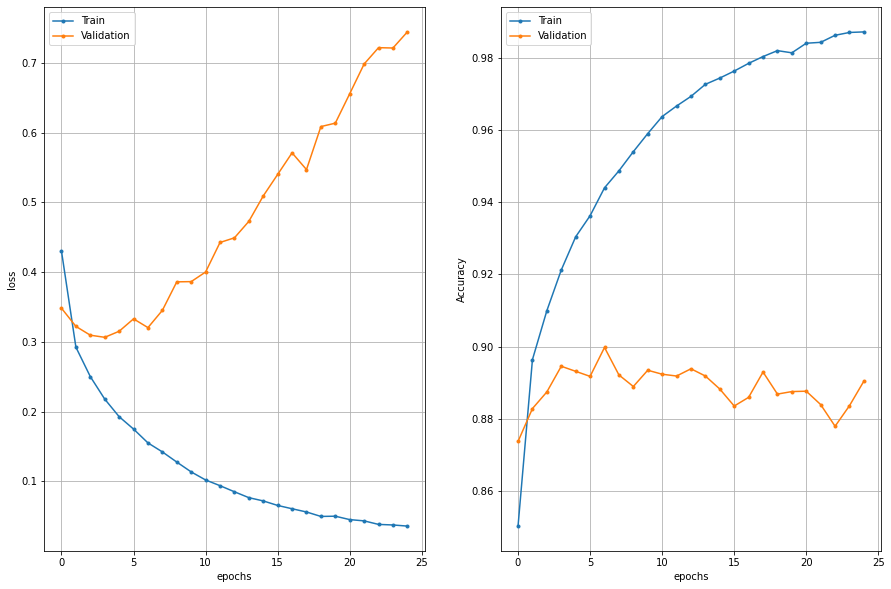

In [84]:
plot_history(history)

## Pooling

In [99]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(64)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_33 (Flatten)        (None, 6272)              0         
                                                                 
 dense_65 (Dense)            (None, 64)                401472    
                                                                 
 dense_66 (Dense)            (None, 10)                650       
                                                          

In [100]:
epochs = 25
batch_size = 64
steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)
print(x_train.shape)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

(60000, 28, 28)
Epoch 1/25
938/938 [==============================] - 6s 6ms/step - loss: 0.4435 - accuracy: 0.8449 - val_loss: 0.3644 - val_accuracy: 0.8729
Epoch 2/25
938/938 [==============================] - 6s 6ms/step - loss: 0.3104 - accuracy: 0.8908 - val_loss: 0.3130 - val_accuracy: 0.8901
Epoch 3/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2734 - accuracy: 0.9027 - val_loss: 0.3124 - val_accuracy: 0.8883
Epoch 4/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2467 - accuracy: 0.9116 - val_loss: 0.2977 - val_accuracy: 0.8947
Epoch 5/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2286 - accuracy: 0.9168 - val_loss: 0.3101 - val_accuracy: 0.8925
Epoch 6/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2130 - accuracy: 0.9232 - val_loss: 0.2929 - val_accuracy: 0.8989
Epoch 7/25
938/938 [==============================] - 7s 7ms/step - loss: 0.1995 - accuracy: 0.9276 - val_loss: 0.3000 - val_accurac

Train Acc      0.9653000235557556
Validation Acc 0.8977000117301941


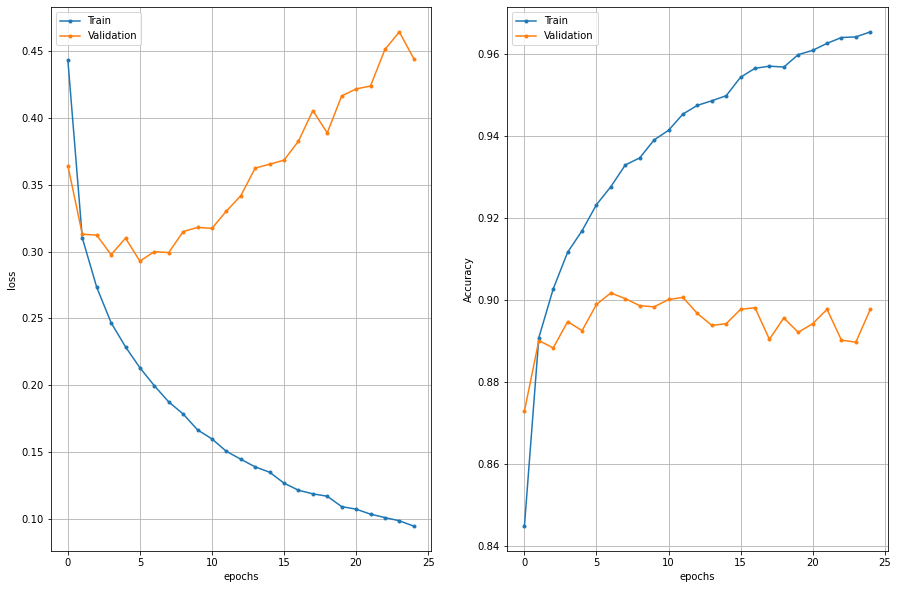

In [101]:
plot_history(history)

In [32]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                     

In [36]:
# Train the network

epochs = 25
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/25
937/937 [==============================] - 8s 8ms/step - loss: 0.2368 - accuracy: 0.9136 - val_loss: 0.2466 - val_accuracy: 0.9092
Epoch 2/25
937/937 [==============================] - 8s 9ms/step - loss: 0.2308 - accuracy: 0.9151 - val_loss: 0.2467 - val_accuracy: 0.9109
Epoch 3/25
937/937 [==============================] - 10s 10ms/step - loss: 0.2321 - accuracy: 0.9142 - val_loss: 0.2401 - val_accuracy: 0.9158
Epoch 4/25
937/937 [==============================] - 10s 11ms/step - loss: 0.2306 - accuracy: 0.9162 - val_loss: 0.2484 - val_accuracy: 0.9093
Epoch 5/25
937/937 [==============================] - 10s 11ms/step - loss: 0.2264 - accuracy: 0.9168 - val_loss: 0.2540 - val_accuracy: 0.9075
Epoch 6/25
937/937 [==============================] - 10s 11ms/step - loss: 0.2289 - accuracy: 0.9153 - val_loss: 0.2519 - val_accuracy: 0.9071
Epoch 7/25
937/937 [==============================] - 10s 11ms/step - loss: 0.2248 - accuracy: 0.9172 - val_loss: 0.2405 - val_accuracy: 0.9

Train Acc      0.9222585558891296
Validation Acc 0.9132000207901001


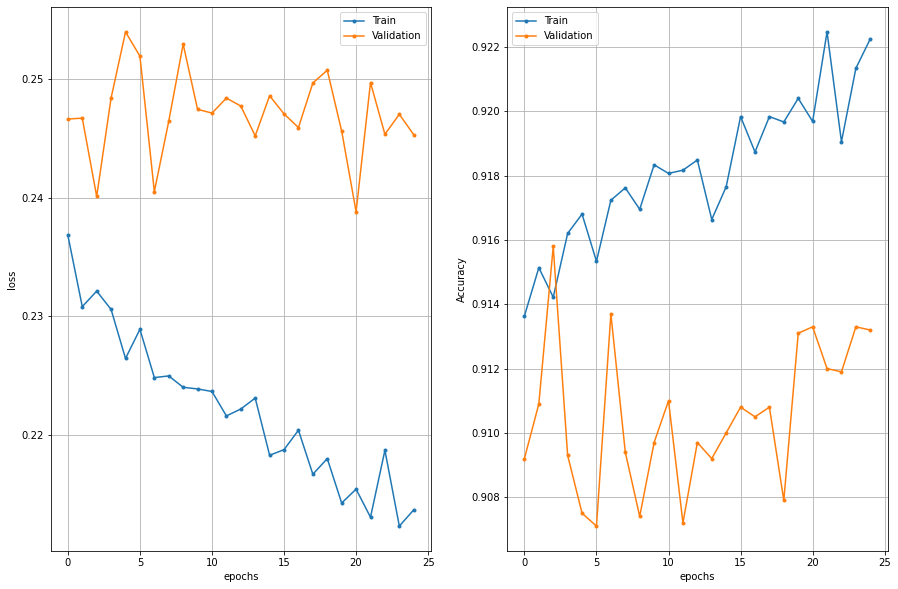

In [37]:
plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

I used Pooling, Dropout, Data augmentation and added more layers and got 

Train Acc      0.9222585558891296
Validation Acc 0.9132000207901001

Yes, Early stopping and Batch normalization did not help and I removed it to decreac complexity. But I enjoy this method, they works good enoug when I tried them alone